In [1]:
%matplotlib notebook

In [2]:
from cartopy.io import shapereader


kw = dict(resolution='50m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)


In [3]:
from __future__ import unicode_literals

states = ('Minas Gerais', 'Mato Grosso', 'Goiás',
          'Bahia', 'Rio Grande do Sul', 'São Paulo')

<IPython.core.display.Javascript object>


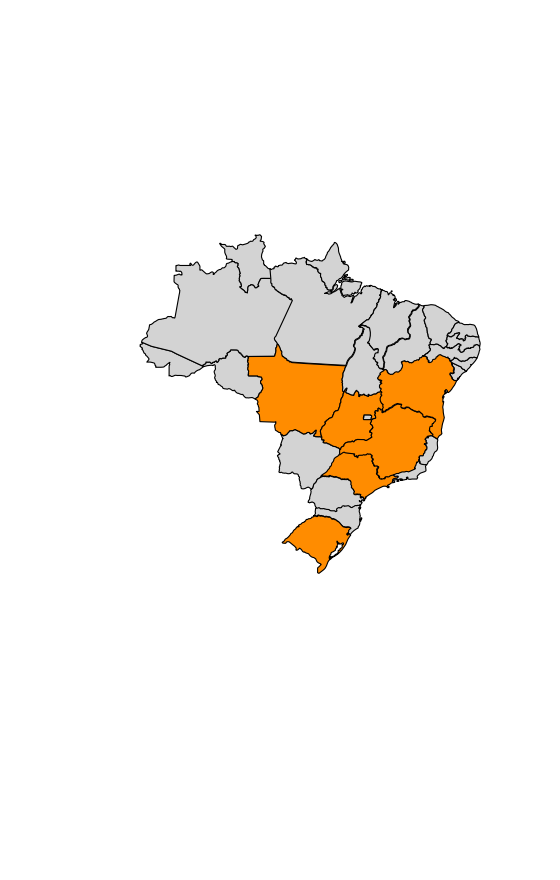

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 11),
                       subplot_kw=subplot_kw)
ax.set_extent([-82, -32, -45, 10])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name'].decode('latin-1')
    if name in states:
        facecolor = 'DarkOrange'
    else:
        facecolor = 'LightGray'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='black')


In [5]:
import os
import shapefile
from json import dumps


def shape2json(fname, outfile="states.json", country='Brazil'):
    reader = shapefile.Reader(fname)
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]

    data = []
    for sr in reader.shapeRecords():
        atr = dict(zip(field_names, sr.record))
        geom = sr.shape.__geo_interface__
        if country in sr.record[field_names.index('admin')]:
            name = sr.record[field_names.index('name')].decode('latin-1')
            if name in states:
                data.append(dict(type="Feature", geometry=geom, properties=atr))
            
    keys = ['abbrev', 'name', 'name_alt']
    for b in data:
        for key in keys:
            b['properties'][key] = b['properties'][key].decode('latin-1')

    with open(outfile, "w") as geojson:
        geojson.write(dumps({"type": "FeatureCollection",
                             "features": data}, indent=2) + "\n")


shape = '50m_admin_1_states_provinces.shp'
cartopy_cache = '.local/share/cartopy/shapefiles/natural_earth/cultural/'
fname = os.path.join(os.path.expanduser('~'), cartopy_cache, shape)

shape2json(fname, outfile="states.json", country='Brazil')

In [8]:
import folium
import numpy as np
from IPython.display import IFrame


bbox = [-82, -32, -45, 10]

lon_center, lat_center = np.array(bbox).reshape(2, 2).mean(axis=0)
mapa = folium.Map(width=650, height=500, zoom_start=4,
                  location=[-15, -50])

mapa.geo_json(geo_path='states.json', fill_color='none', line_color='Orange')


In [9]:
mapa